# Logistic regression implemented in Python

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

## Logistic regression algorithm

In [2]:
class LogisticRegression:
    
    def __init__(self):
        pass
    
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def train(self, X, y, rate, niter):
        
        # Step 0: Initialization
        n_samples, n_features = X.shape
        self.weight = np.random.normal(0, 1, (n_features, 1))
        self.bias = np.random.normal(0, 1, 1)
        costs = []
        
        for i in range(niter):
            
            # Step 1: Compute a linear basis function
            f = np.dot(X, self.weight) + self.bias
            
            # Step 2: Apply the sigmoid function
            y_predict = self.sigmoid(f)
            
            # Step 3: Compute the cross-entropy cost
            cost = (-1 / n_samples) * np.sum (y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
            
            # Step 4: Compute the gradient
            d_weight = (1 / n_samples) * np.dot(X.T, (y_predict - y))
            d_bias = (1 / n_samples) * np.sum(y_predict - y)
            
            # Step 5: Update the parameters
            self.weight -= rate * d_weight
            self.bias -= rate * d_bias
            
            costs.append(cost)
            
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
            
        return self.weight, self.bias, costs
    
    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weight) + self.bias)
        y_predict_label = [1 if elem > 0.5 else 0 for elem in y_predict]
        
        return np.array(y_predict_label)[:, np.newaxis]

## Dataset

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1) # Perceptron-style label encoding
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

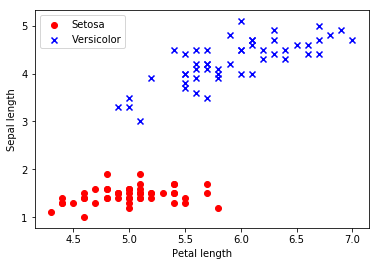

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (75, 2)
Shape of X_test: (25, 2)
Shape of y_train: (75, 1)
Shape of y_test: (25, 1)


## Train and test a logistic regressor

In [8]:
p = LogisticRegression()

w_trained, b_trained, costs = p.train(X_train, y_train, rate = 0.05, niter = 1000)

Cost after iteration 0: 6.209603536035214
Cost after iteration 100: 0.10324469780057528
Cost after iteration 200: 0.07417687530112968
Cost after iteration 300: 0.05819454415468275
Cost after iteration 400: 0.04808236461325815
Cost after iteration 500: 0.041099290355731295
Cost after iteration 600: 0.03598049745116449
Cost after iteration 700: 0.032062318175831224
Cost after iteration 800: 0.028963133994109536
Cost after iteration 900: 0.026447914518725663


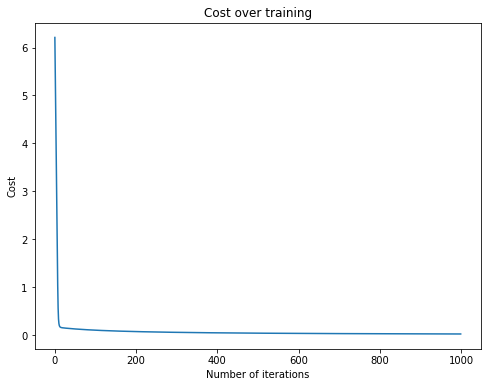

In [9]:
fig = plt.figure(figsize = (8, 6))
plt.plot(np.arange(1000), costs)
plt.title("Cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [10]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"Training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"Testing accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

Training accuracy: 100.0%
Testing accuracy: 100.0%


## Plot

In [11]:
def plot_hyperplane(X, y, weight, bias):
    slope = - weight[0]/weight[1]
    intercept = - bias/weight[1]
    x_hyperplane = np.linspace(4,7,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Versicolor')
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Data and fitted decision hyperplane")
    plt.xlabel("Petal length")
    plt.ylabel("Sepal length")
    plt.legend(loc = 'upper left')
    plt.show()

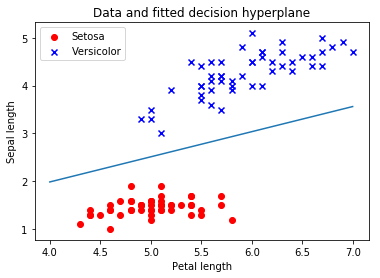

In [12]:
plot_hyperplane(X, y, w_trained, b_trained)